# Make plots
This notebook loads the results coming from `../scripts/aging_model_challenge.py` and plot the results.

In [219]:
import cPickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-paper')
plt.rc('text', usetex=False)

import warnings
warnings.filterwarnings('ignore')

# 0. Load `pkl` files

In [220]:
def load_pkl(filename):
    """Load the input pkl file."""
    with open(filename,'rb') as f:
        dd = pkl.load(f)
    return dd

In [221]:
# Load model assessment result
scores_poly = load_pkl('../../scripts/scores_poly.pkl')
scores = load_pkl('../../scripts/scores_.pkl')

AttributeError: 'module' object has no attribute 'DeprecationDict'

# 1. Plot poly scores

In [4]:
print(scores_poly.keys())

['kernel_ridge', 'ridge', 'linear_regression', 'linear_svr', 'random_forests', 'mlp', 'rbf_svr', 'elasticnet', 'gradient_boosting', 'lasso']


In [5]:
full_length_name = {}
full_length_name['MAE'] = 'mean_absolute_error'
full_length_name['MSE'] = 'mean_squared_error'
full_length_name['R2'] = 'r2'
full_length_name['EV'] = 'explained_variance'

In [6]:
def plot_score(score_dict, metric='MAE', save_figure=False, tag=''):
    """Plot the scores exploring the scores dictionary.
    
    score_dict: the ouput of `cross_validate`
    metric: either MAE, MSE, R2, EV
    save_figure: bool
    tag: either '' or 'poly' (for polynomial features)
    """    
    plt.figure(figsize=(8,16))
    
    for i, method in enumerate(scores_poly.keys()):
        score_ts = score_dict[method]['test_'+full_length_name[metric]]
        score_tr = score_dict[method]['train_'+full_length_name[metric]]
        
        # Flip sign for negative mean absolute or squared error
        if metric=='MAE' or metric=='MSE':
            score_ts = -score_ts
            score_tr = -score_tr
        
        # Plot section
        plt.subplot(5,2,i+1)
        plt.hist(score_ts, bins=20,
                 label='{} test: {:2.3f}'.format(metric, np.mean(score_ts)))
        plt.hist(score_tr, bins=20, alpha=0.5,
                 label='{} train: {:2.3f}'.format(metric, np.mean(score_tr)))
        plt.title('{} {}'.format(metric, method))
        plt.legend()
    
    plt.tight_layout()
    if save_figure:
        plt.savefig('../../images/{}_{}.png'.format(metric, tag))
    return plt

# 1.1 Make `poly` plots

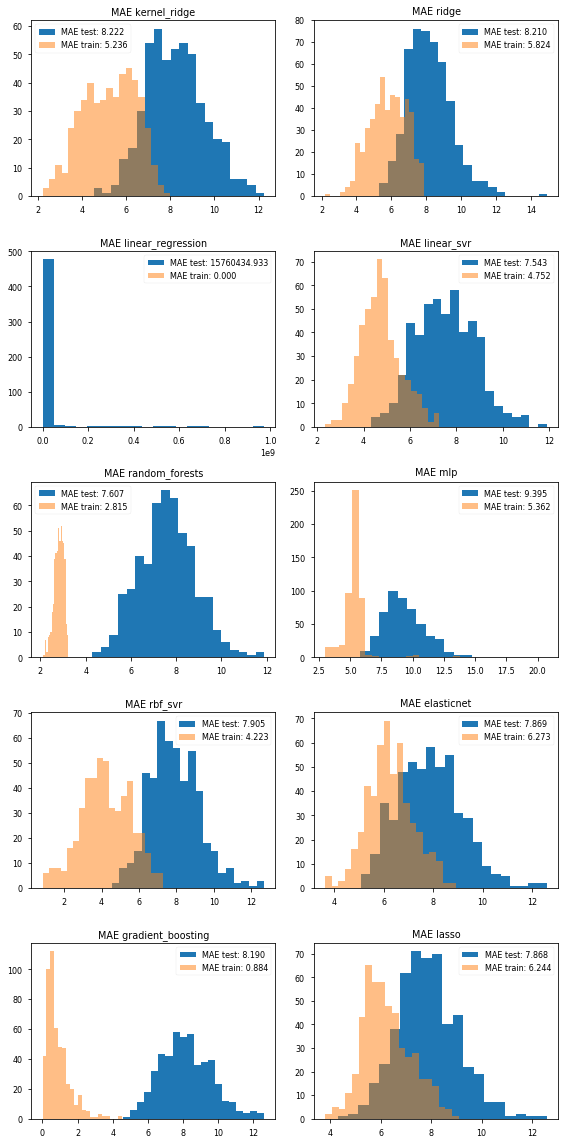

In [7]:
# MAE
plot_score(scores_poly, metric='MAE', save_figure=False, tag='poly');

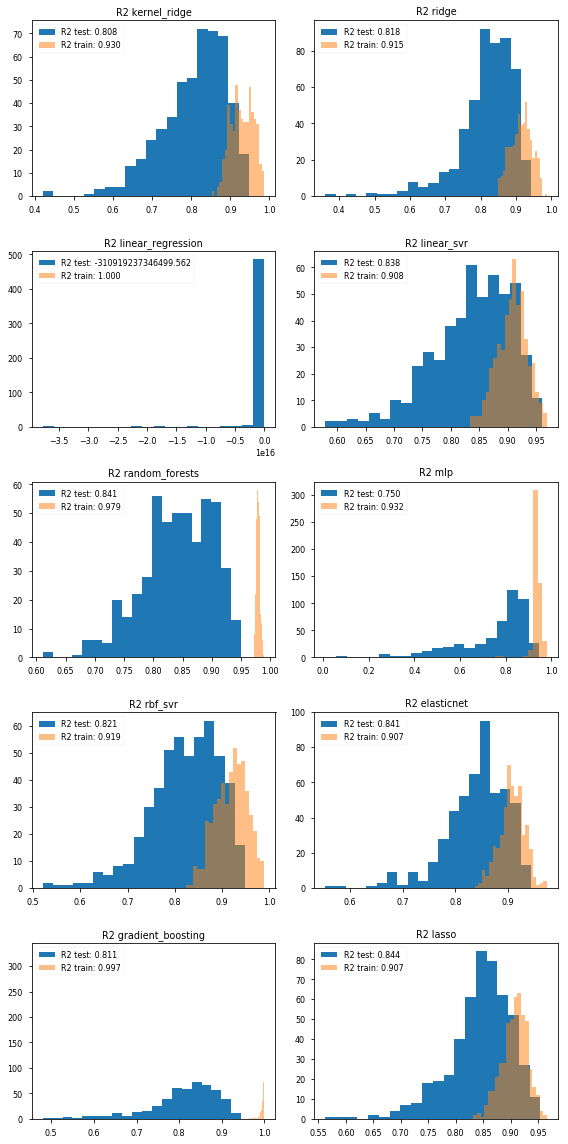

In [8]:
# R2
plot_score(scores_poly, metric='R2', save_figure=False, tag='poly');

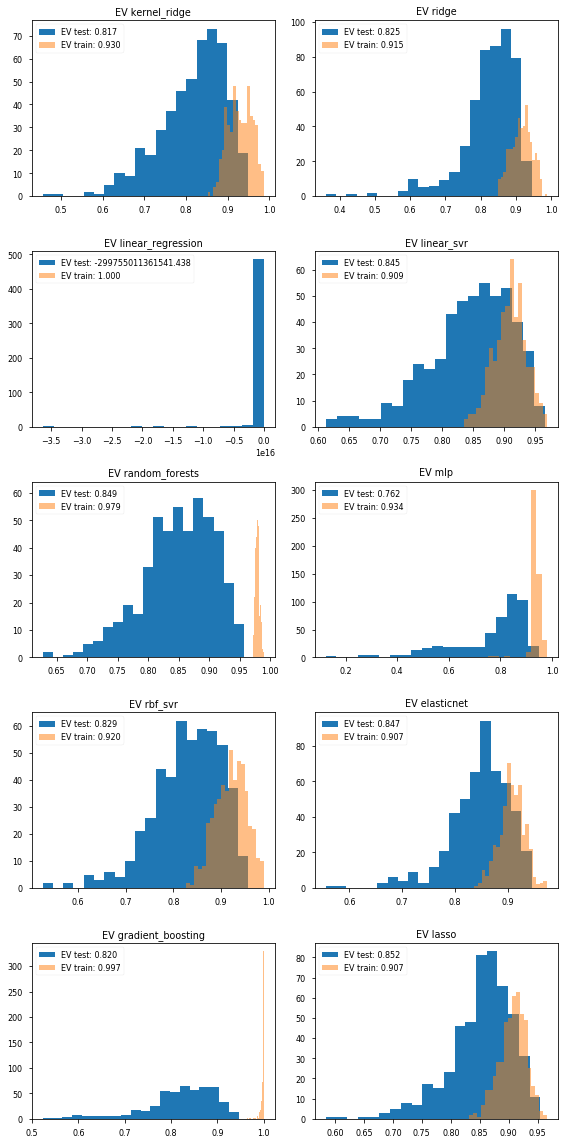

In [9]:
# EV
plot_score(scores_poly, metric='EV', save_figure=False, tag='poly');

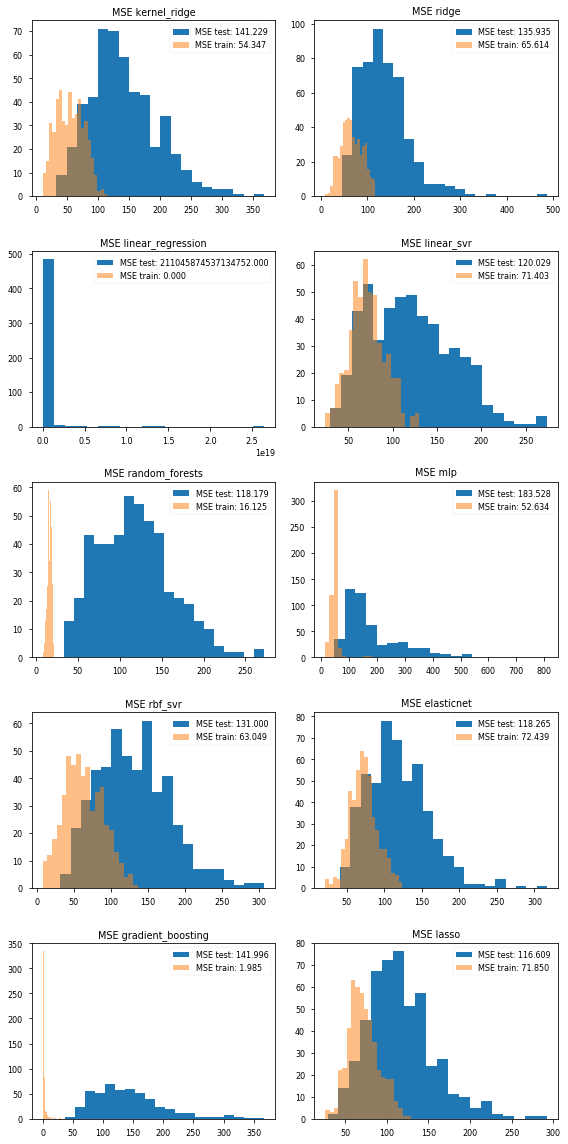

In [10]:
# MSE
plot_score(scores_poly, metric='MSE', save_figure=False, tag='poly');

# 1.2 Make non `poly` plots

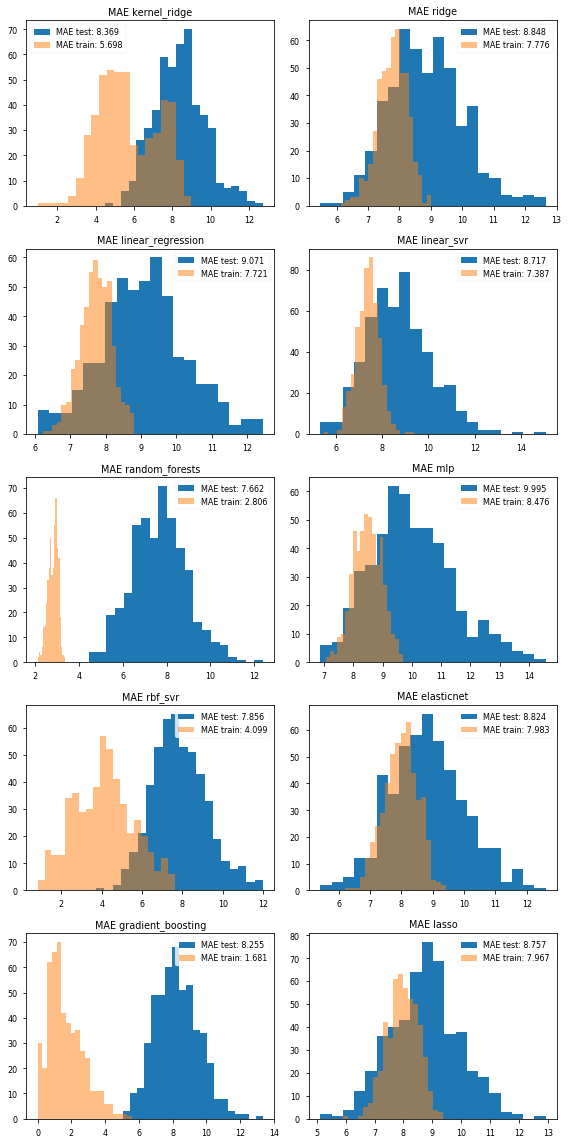

In [11]:
# MAE
plot_score(scores, metric='MAE', save_figure=False, tag='');

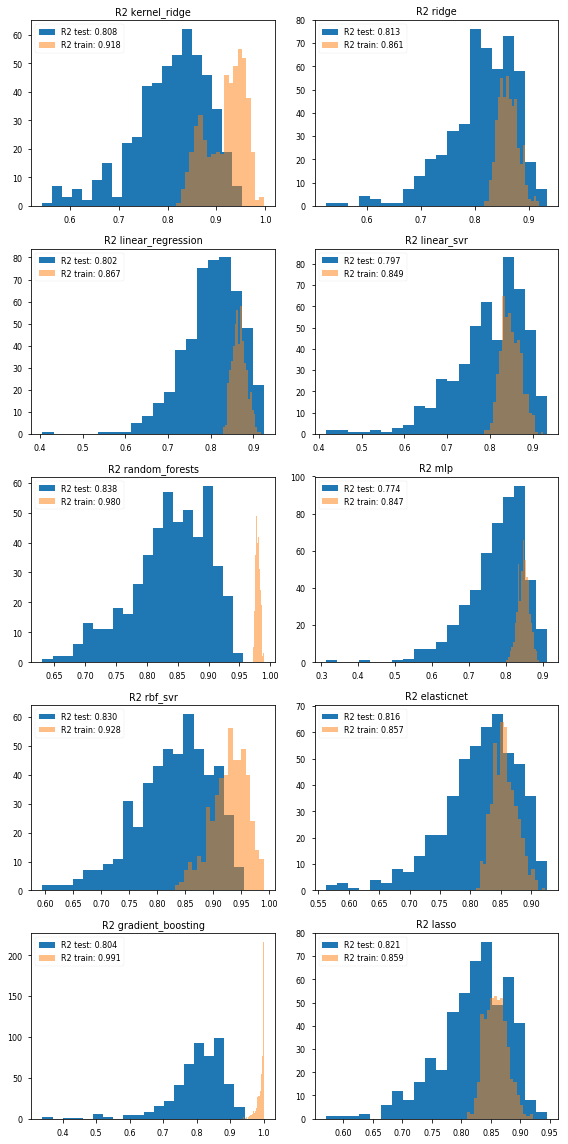

In [12]:
# R2
plot_score(scores, metric='R2', save_figure=False, tag='');

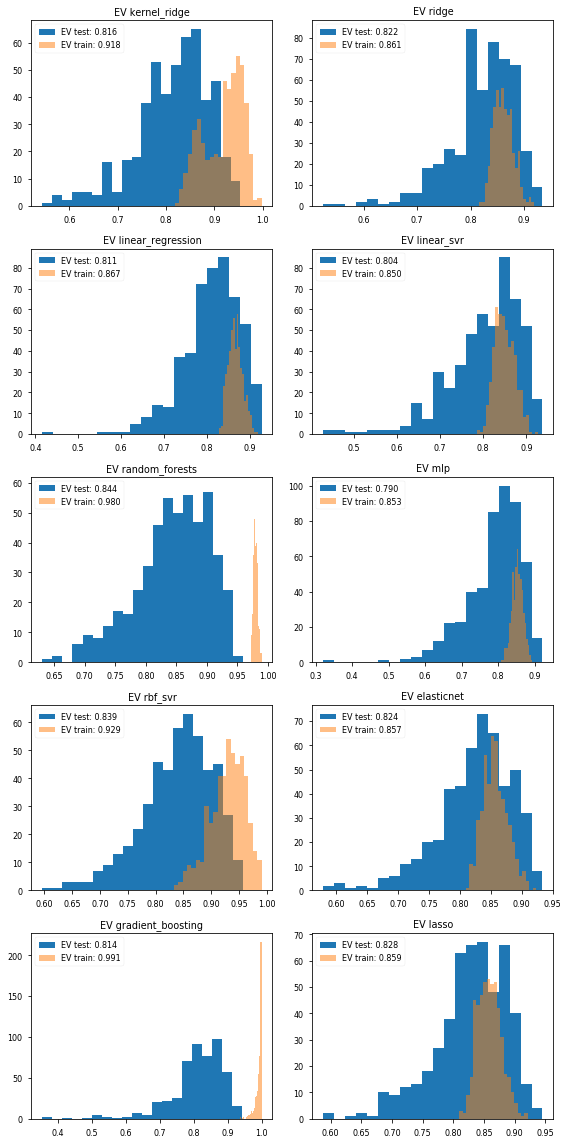

In [13]:
# EV
plot_score(scores, metric='EV', save_figure=False, tag='');

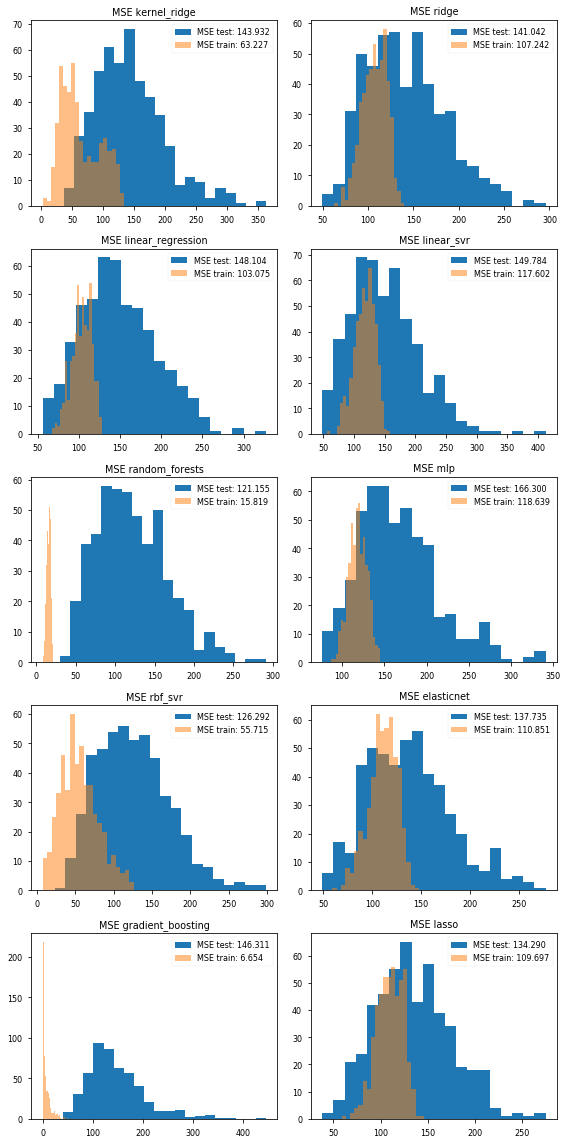

In [14]:
# MSE
plot_score(scores, metric='MSE', save_figure=False, tag='');

# 2. Make summary table

In [39]:
metrics = ['MAE', 'MSE', 'EV', 'R2']
methods = scores.keys()

summary = pd.DataFrame(columns=metrics,
                       index=[method+tail for method in methods for tail in ['','_poly']])

for _scores, _tail in zip((scores, scores_poly), ('', '_poly')):
    for metric in metrics: # columns of the summary data frame
        for method in methods: # rows of the summary data frame        
            mu = np.mean(_scores[method]['test_'+full_length_name[metric]])
            sigma = np.std(_scores[method]['test_'+full_length_name[metric]])
            # Flip sign for negative mean absolute or squared error
            if metric=='MAE' or metric=='MSE':
                mu = -mu
            summary[metric].loc[method+_tail] = r'{:2.3f}$\pm${:2.3f}'.format(mu, sigma)
summary

,MAE,MSE,EV,R2
kernel_ridge,8.369$\pm$1.306,143.932$\pm$56.301,0.816$\pm$0.074,0.808$\pm$0.077
kernel_ridge_poly,8.222$\pm$1.326,141.229$\pm$54.793,0.817$\pm$0.079,0.808$\pm$0.083
ridge,8.848$\pm$1.172,141.042$\pm$43.490,0.822$\pm$0.061,0.813$\pm$0.063
ridge_poly,8.210$\pm$1.274,135.935$\pm$52.264,0.825$\pm$0.077,0.818$\pm$0.079
linear_regression,9.071$\pm$1.203,148.104$\pm$45.651,0.811$\pm$0.065,0.802$\pm$0.067
linear_regression_poly,15760434.933$\pm$85613510.386,211045874537134752.000$\pm$1604353548204884480...,-299755011361541.438$\pm$2262628332868860.000,-310919237346499.562$\pm$2346898802668675.000
linear_svr,8.717$\pm$1.394,149.784$\pm$55.156,0.804$\pm$0.084,0.797$\pm$0.085
linear_svr_poly,7.543$\pm$1.286,120.029$\pm$46.968,0.845$\pm$0.068,0.838$\pm$0.070
random_forests,7.662$\pm$1.259,121.155$\pm$44.465,0.844$\pm$0.060,0.838$\pm$0.062
random_forests_poly,7.607$\pm$1.225,118.179$\pm$43.992,0.849$\pm$0.058,0.841$\pm$0.060


In [ ]:
summary.to_latex('summary.tex')

# 3. Statistical tests
To test if the error distribution without poly is higher than the one with poly we use the one-tailed two-sample kolmogorov smirnov test.

In [74]:
from scipy.stats import ks_2samp
from decimal import Decimal

stats = pd.DataFrame(columns=['p-value '+m for m in metrics], index=methods)

for metric in metrics: # columns of the summary data frame
    for method in methods: # rows of the summary data frame        
        _score = scores[method]['test_'+full_length_name[metric]]
        _score_poly = scores_poly[method]['test_'+full_length_name[metric]]
        
        _, p_val = ks_2samp(_score, _score_poly)
        stats['p-value '+metric].loc[method] = '{:.2e}'.format(p_val/2.0) # one-tailed test
        #stats['p-value '+metric].loc[method] = p_val/2.0
stats

,p-value MAE,p-value MSE,p-value EV,p-value R2
kernel_ridge,3.28e-02,1.80e-01,2.75e-01,2.75e-01
ridge,4.44e-14,6.22e-03,5.06e-03,6.22e-03
linear_regression,2.25e-221,2.25e-221,2.25e-221,2.25e-221
linear_svr,6.20e-26,5.07e-11,4.33e-10,2.84e-10
random_forests,2.75e-01,3.01e-01,3.28e-01,3.81e-01
mlp,1.95e-13,2.33e-08,8.31e-07,8.31e-07
rbf_svr,4.65e-01,9.54e-02,1.96e-02,8.29e-02
elasticnet,1.76e-22,9.92e-10,9.92e-10,4.96e-09
gradient_boosting,1.60e-01,7.18e-02,1.25e-01,7.18e-02
lasso,1.09e-28,3.39e-12,8.49e-12,3.27e-11


In [71]:
stats.to_latex('stats.tex')

In [73]:
significant = pd.DataFrame(data=stats.values < 0.01,
    columns=['p-value '+m for m in metrics], index=methods)
significant

,p-value MAE,p-value MSE,p-value EV,p-value R2
kernel_ridge,False,False,False,False
ridge,True,True,True,True
linear_regression,True,True,True,True
linear_svr,True,True,True,True
random_forests,False,False,False,False
mlp,True,True,True,True
rbf_svr,False,False,False,False
elasticnet,True,True,True,True
gradient_boosting,False,False,False,False
lasso,True,True,True,True


# 4. Make stability selection plots
Stability selection of the Lasso.

In [222]:
with open('../../scripts/ss_lasso_coefs.pkl','rb') as f:
    coefs = pkl.load(f)
with open('../../scripts/ss_lasso_scores.pkl','rb') as f:
    scores = pkl.load(f)

In [223]:
# Sanity check
r2 = []
mae = []
mse = []
ev = []
for score in scores:
    r2.append(score['R2'])
    ev.append(score['EV'])
    mae.append(score['MAE'])
    mse.append(score['MSE'])
r2 = np.array(r2)
ev = np.array(ev)
mse = np.array(mse)
mae = np.array(mae)

print('R2: {} +- {}'.format(np.mean(r2), np.std(r2)))
print('EV: {} +- {}'.format(np.mean(ev), np.std(ev)))
print('MAE: {} +- {}'.format(np.mean(mae), np.std(mae)))
print('MSE: {} +- {}'.format(np.mean(mse), np.std(mse)))
# sanity check passed!

R2: 0.846948371541 +- 0.0590114621917
EV: 0.853745292806 +- 0.0577461199576
MAE: 7.80241962384 +- 1.23429975288
MSE: 114.920332797 +- 41.4749954024


Get the polyfeat names

In [224]:
from sklearn.preprocessing import PolynomialFeatures
from fancyimpute import KNN
import pandas as pd

def preprocess(dfx, poly_feat=False):
    """Categorical feature mapping + KNN imputing.

    dfx: input data DataFrame object with shape (n,d)
    """
    # 1. Convert gender [m/f] in [0,1]
    dfx.loc[:, 'gender'] = dfx['gender'].apply(lambda x: int(x == 'f'))

    # 2. Impute missing values via KNN
    dfx = pd.DataFrame(data=KNN(k=3).complete(dfx.values),
                       index=dfx.index, columns=dfx.columns)

    # 3. If needed, compute polynomial features
    if poly_feat:
        polyfeat = PolynomialFeatures(degree=2, include_bias=True)
        dfx_values = polyfeat.fit_transform(dfx.values)
        dfx_columns = polyfeat.get_feature_names(dfx.columns)
        dfx = pd.DataFrame(data=dfx_values,
                           index=dfx.index,
                           columns=dfx_columns)

    return dfx

In [225]:
_dfx = pd.read_csv('../../data/aging_data.csv', header=0, index_col=0).drop('age', axis=1) # remove labels
dfx = preprocess(_dfx, poly_feat=True)
dfx = dfx.drop('gender^2', axis=1) # drop nonsense feature
feature_names = dfx.columns
print('Features are:')
print(feature_names.tolist())

Imputing row 1/118 with 0 missing, elapsed time: 0.004
Imputing row 101/118 with 0 missing, elapsed time: 0.005
Features are:
['1', 'gender', 'CO-Pyr/Mal', 'CO-Succinate', 'ATP-Pyr/Mal', 'ATP-Succinate', 'PO-Pyr/Mal', 'PO-Succinate', 'ATP', 'AMP', 'ATP/AMP', 'MDA', 'LDH', 'gender CO-Pyr/Mal', 'gender CO-Succinate', 'gender ATP-Pyr/Mal', 'gender ATP-Succinate', 'gender PO-Pyr/Mal', 'gender PO-Succinate', 'gender ATP', 'gender AMP', 'gender ATP/AMP', 'gender MDA', 'gender LDH', 'CO-Pyr/Mal^2', 'CO-Pyr/Mal CO-Succinate', 'CO-Pyr/Mal ATP-Pyr/Mal', 'CO-Pyr/Mal ATP-Succinate', 'CO-Pyr/Mal PO-Pyr/Mal', 'CO-Pyr/Mal PO-Succinate', 'CO-Pyr/Mal ATP', 'CO-Pyr/Mal AMP', 'CO-Pyr/Mal ATP/AMP', 'CO-Pyr/Mal MDA', 'CO-Pyr/Mal LDH', 'CO-Succinate^2', 'CO-Succinate ATP-Pyr/Mal', 'CO-Succinate ATP-Succinate', 'CO-Succinate PO-Pyr/Mal', 'CO-Succinate PO-Succinate', 'CO-Succinate ATP', 'CO-Succinate AMP', 'CO-Succinate ATP/AMP', 'CO-Succinate MDA', 'CO-Succinate LDH', 'ATP-Pyr/Mal^2', 'ATP-Pyr/Mal ATP-Succin

In [226]:
# print list of selected variables
selected = []
for coef in coefs:
    sel_idx = np.nonzero(coef)[0]
    sel_feat = feature_names[sel_idx].tolist()
    selected.extend(sel_feat)

In [227]:
# Count the number of times each feature is collected
from collections import Counter
counter = Counter(selected)

# Prepare the arrays for the plot
feats = counter.keys()
counts = np.array([counter[f] for f in feats])

# Sort by number of selection
idx = np.argsort(counts)[::-1]
sorted_counts = counts[idx]
sorted_feats = np.array(feats)[idx]

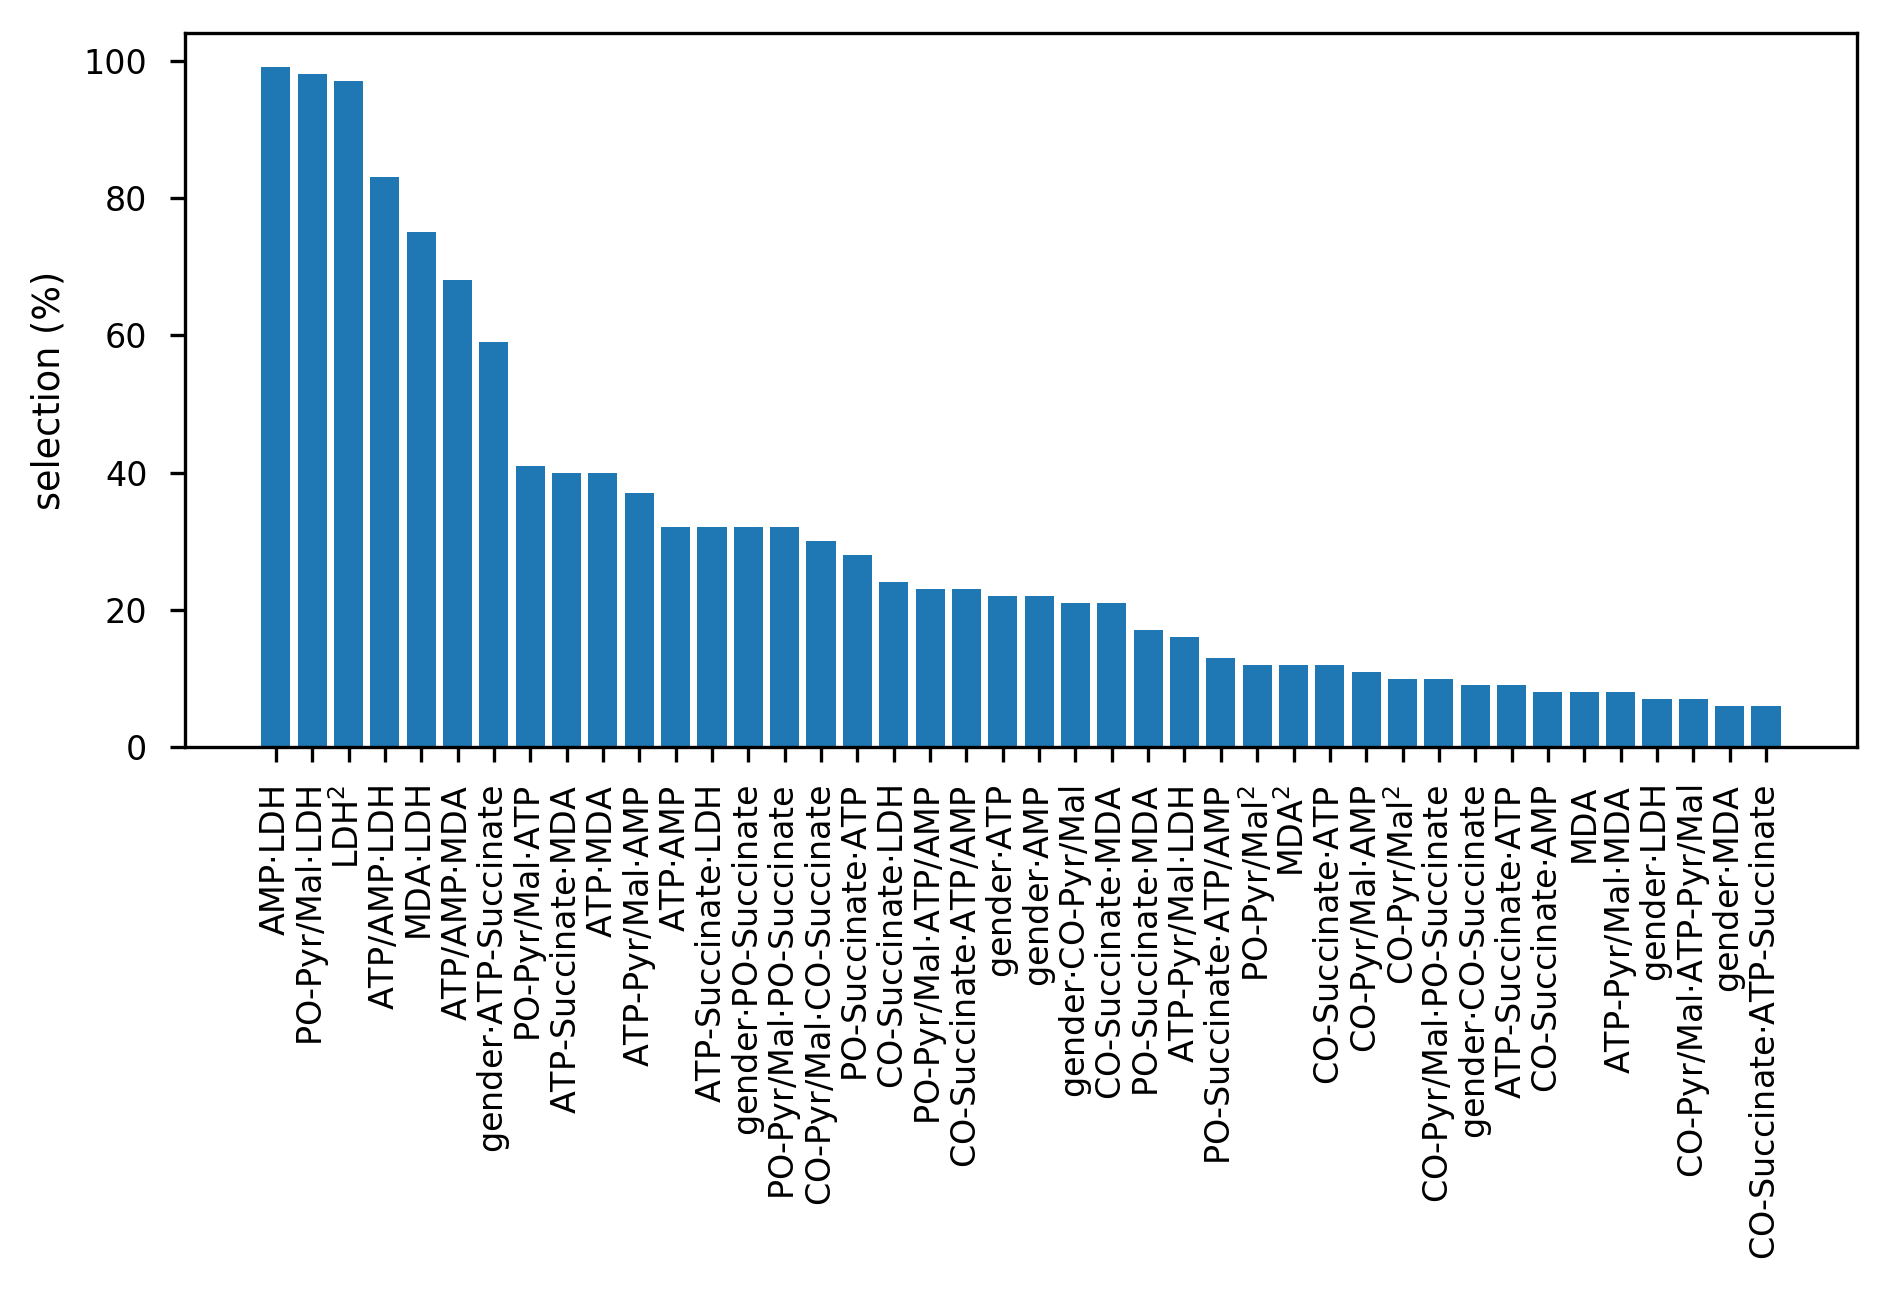

In [228]:
import re
xmax = np.int(0.5 * len(sorted_counts))

plt.figure(dpi=300)
plt.bar(np.arange(xmax), 100*sorted_counts[:xmax]/len(scores))
plt.xticks(np.arange(xmax), [r'{}'.format(re.sub('\^2', '$^2$', re.sub(' ', '$ \cdot $', s))) for s in sorted_feats[:xmax]], rotation=90)
plt.ylabel('selection (%)')

plt.tight_layout()

plt.savefig('../../images/aging_topfeatures.png');

# 5. Learn the best model

In [229]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 0. Load data
df = pd.read_csv('../../data/aging_data.csv', header=0, index_col=0)
features = df.columns.drop('age')
print('- Raw data loaded.')

# 1. Split data/labels
raw_data = df[features]
labels = df['age']
print('- {} samples / {} features.'.format(*raw_data.shape))

# 2. Preprocess raw data
data = preprocess(raw_data, poly_feat=True)
data = data.drop('gender^2', axis=1) # drop nonsense feature

# 3. Define the cross-validated pipeline
pipe = Pipeline([['preproc', StandardScaler()],
                 ['predict', Lasso()]])
pipe_cv = GridSearchCV(pipe, param_grid={'predict__alpha': np.logspace(-3, 2, 30)},
                       n_jobs=-1, cv=ShuffleSplit(n_splits=100, test_size=0.25))

# 4. Fit the model
pipe_cv.fit(data, labels)

- Raw data loaded.
- 118 samples / 12 features.
Imputing row 1/118 with 0 missing, elapsed time: 0.004
Imputing row 101/118 with 0 missing, elapsed time: 0.004


GridSearchCV(cv=ShuffleSplit(n_splits=100, random_state=None, test_size=0.25, train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[['preproc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['predict', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)]]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'predict__alpha': array([  1.00000e-03,   1.48735e-03,   2.21222e-03,   3.29034e-03,
         4.89390e-03,   7.27895e-03,   1.08264e-02,   1.61026e-02,
         2.39503e-02,   3.56225e-02,   5.29832e-02,   7.88046e-02,
         1.17210e-01,   1.74333e-01,   2.59294e-01,   3.85662e-01,
  ...    1.37382e+01,   2.04336e+01,   3.03920e+01,   4.52035e+01,
         6.72336e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, 

In [230]:
pipe_cv.best_estimator_.steps[1][1]

Lasso(alpha=0.38566204211634725, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

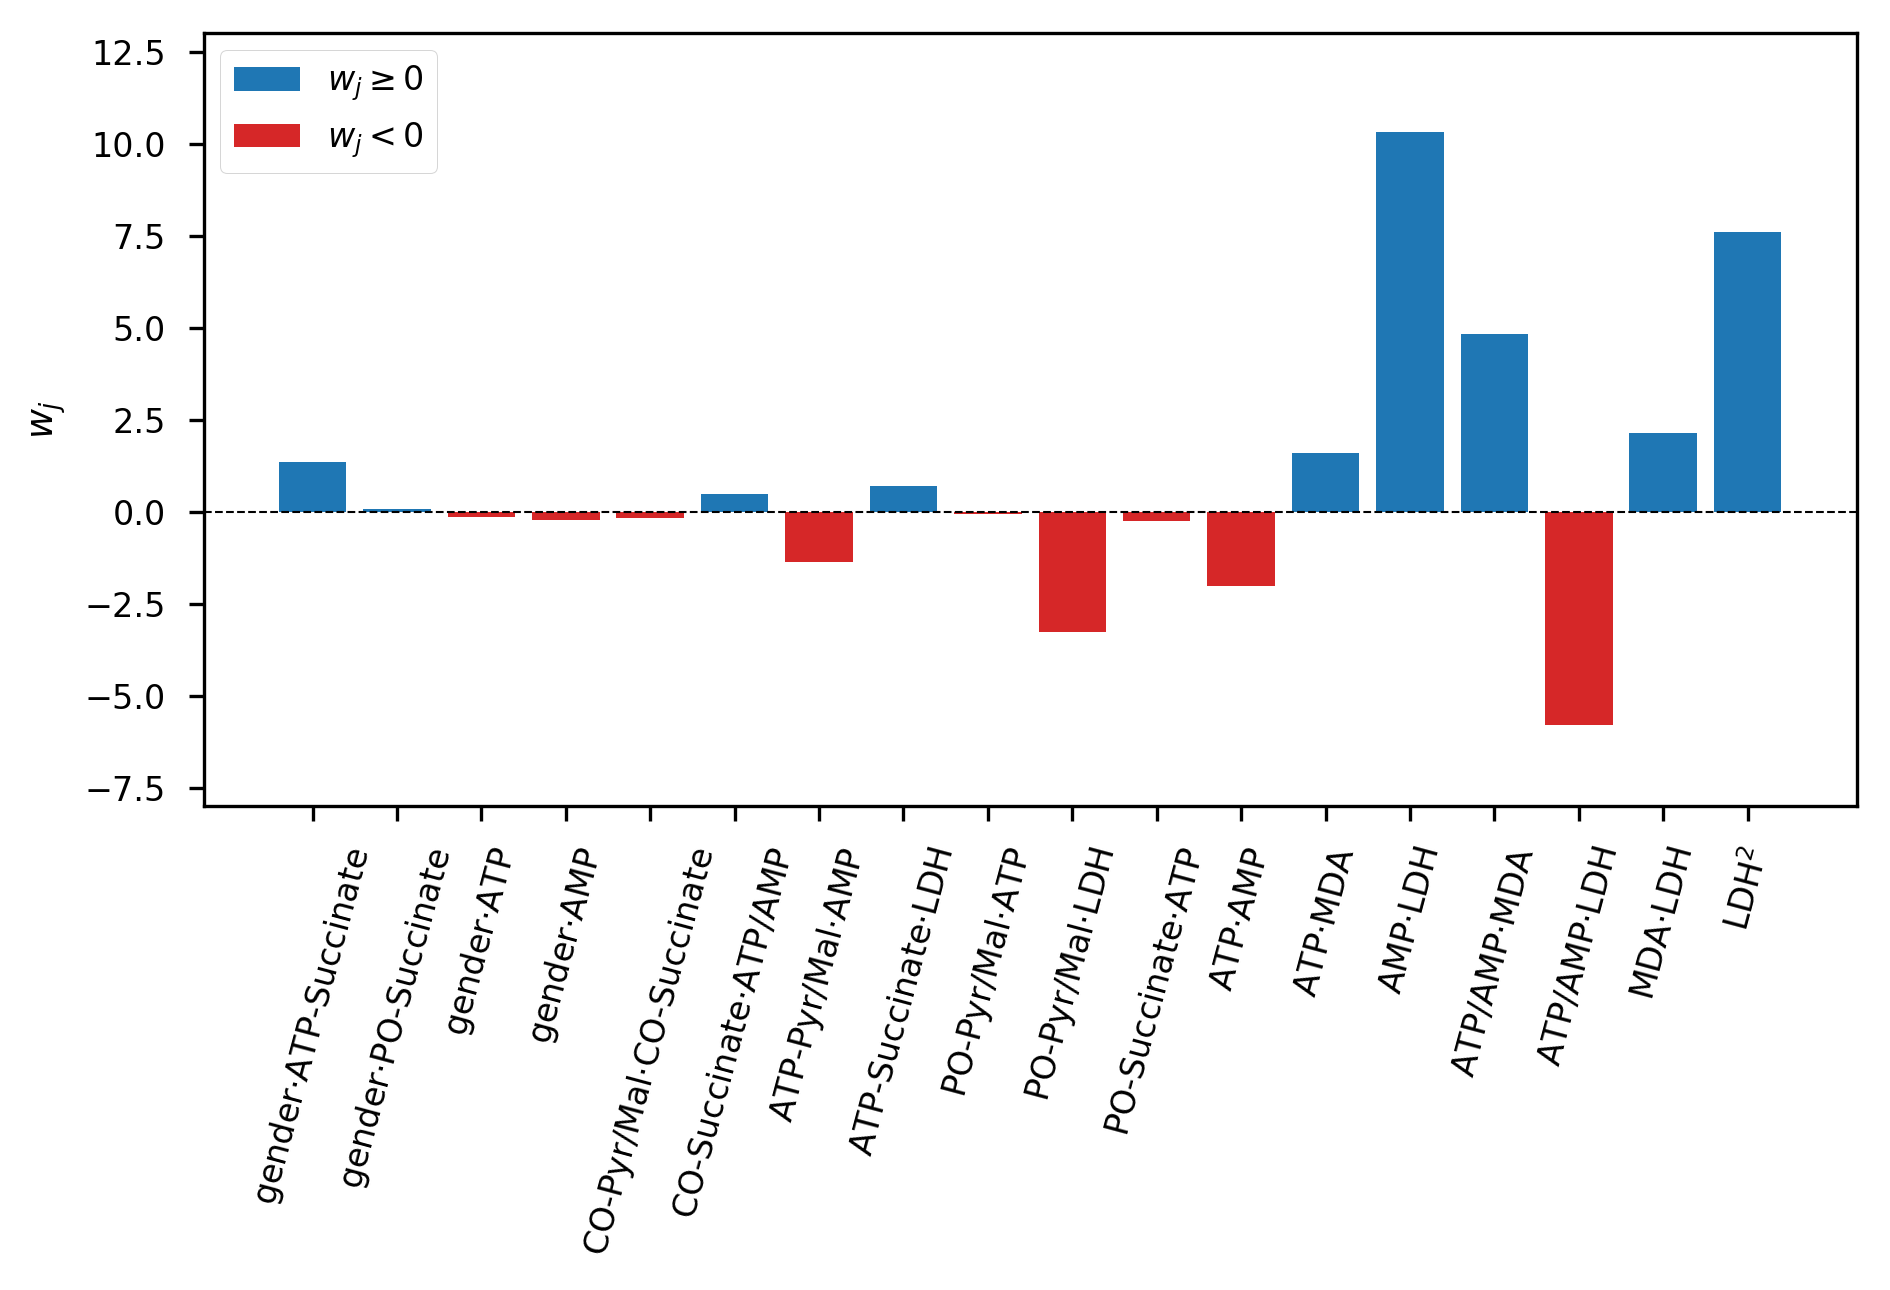

In [231]:
# Make plot
coef = pipe_cv.best_estimator_.steps[1][1].coef_
nonzero = np.nonzero(coef)[0]

# keep only nonzero coefs
nonzero_coef = coef[nonzero]
nonzero_feat_names = data.columns[nonzero]

plt.figure(dpi=300)

xaxis = np.arange(len(nonzero_feat_names))
pos_idx = np.where(nonzero_coef >= 0)[0]
neg_idx = np.where(nonzero_coef < 0)[0]
plt.bar(xaxis[pos_idx], nonzero_coef[pos_idx], label=r'$w_j \geq 0$', color='C0') # positive coefs
plt.bar(xaxis[neg_idx], nonzero_coef[neg_idx], label=r'$w_j < 0$', color='C3') # negative coefs
plt.axhline(color='k', linewidth=0.5, linestyle='dashed')
plt.ylabel(r'$w_j$')
plt.xticks(xaxis, [r'{}'.format(re.sub('\^2', '$^2$', re.sub(' ', '$ \cdot $', s))) for s in nonzero_feat_names], rotation=75)
plt.ylim([-8, 13])
plt.legend(loc=2)
plt.tight_layout()

plt.savefig('../../images/aging_lassopolyfeat.png')